In [46]:
import astropy.units as u
import astropy.coordinates as coord
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
import gala.integrate as gi
import gala.dynamics as gd
import gala.potential as gp
from gala.units import galactic
import scipy.optimize as opt

First, define a gravitational potential.

In [47]:
pot = gp.MilkyWayPotential()

Leo I

In [48]:
dict = {
    'ra': 152.117175, #degree
    'e_ra': 0.0001, #degree
    'dec': 12.3065, #degree
    'e_dec': 0.0001, #degree
    'dist': 254.0, #kpc
    'e_dist': 15.5, #kpc
    'pmra': -0.007, #mas/yr
    'e_pmra': 0.035, #mas/yr
    'pmdec': -0.119, #mas/yr not updated
    'e_pmdec': 0.026, #mas/yr not updated
    'rv': 282.9, #km/s
    'e_rv': 0.5, #km/s
    }
dwarf = coord.SkyCoord(
    ra=dict['ra'] * u.degree,
    dec=dict['dec'] * u.degree,
    distance=dict['dist'] * u.kpc,
    pm_ra_cosdec=dict['pmra'] * (u.mas / u.yr),
    pm_dec=dict['pmdec'] * (u.mas / u.yr),
    radial_velocity=dict['rv'] * (u.km / u.s),
    frame="icrs"
)
dwarf_GC = dwarf.transform_to(coord.Galactocentric)

dwarf_ics = gd.PhaseSpacePosition(pos=dwarf_GC.cartesian.xyz, vel=dwarf_GC.velocity.d_xyz)
dwarf_orbit = pot.integrate_orbit(dwarf_ics, dt=-0.1*u.Myr, n_steps=1000) # 100 Myr

n_samples = 100
dwarf_ra_samples = np.random.normal(dict['ra'], dict['e_ra'], n_samples)
dwarf_dec_samples = np.random.normal(dict['dec'], dict['e_dec'], n_samples)
dwarf_dist_samples = np.random.normal(dict['dist'], dict['e_dist'], n_samples)
dwarf_pmra_samples = np.random.normal(dict['pmra'], dict['e_pmra'], n_samples)
dwarf_pmdec_samples = np.random.normal(dict['pmdec'], dict['e_pmdec'], n_samples)
dwarf_rv_samples = np.random.normal(dict['rv'], dict['e_rv'], n_samples)

dwarf_ics_list = []
for ra, dec, dist, pmra, pmdec, rv in zip(dwarf_ra_samples, dwarf_dec_samples, dwarf_dist_samples, dwarf_pmra_samples, dwarf_pmdec_samples, dwarf_rv_samples):
    sc = coord.SkyCoord(ra=ra * u.degree,
                  dec=dec * u.degree,
                  distance=dist * u.kpc,
                  pm_ra_cosdec=pmra * (u.mas / u.yr),
                  pm_dec=pmdec * (u.mas / u.yr),
                  radial_velocity=rv * (u.km / u.s),
                  frame="icrs")
    gc = sc.transform_to(coord.Galactocentric)
    ics = gd.PhaseSpacePosition(pos=gc.cartesian.xyz, vel=gc.velocity.d_xyz)
    dwarf_ics_list.append(ics)

dwarf_orbits = []
dwarf_orbits.append(dwarf_orbit)
for ics in dwarf_ics_list:
    orbit = pot.integrate_orbit(ics, dt=-0.1*u.Myr, n_steps=1000)
    dwarf_orbits.append(orbit)

HVS 14

In [49]:
dict14 = {
    'ra': 161.0072805184, #degree
    'e_ra': 0.0001, #degree
    'dec': 6.1941762509, #degree
    'e_dec': 0.0001, #degree
    'dist': 102.66, #kpc
    'e_dist': 16.55, #kpc
    'pmra': -2.17, #mas/yr
    'e_pmra': 1.38, #mas/yr
    'pmdec': 2.28, #mas/yr
    'e_pmdec': 1.68, #mas/yr
    'rv': 537.30, #km/s
    'e_rv': 7.20, #km/s
    }
hvs14 = coord.SkyCoord(
    ra=dict['ra'] * u.degree,
    dec=dict['dec'] * u.degree,
    distance=dict['dist'] * u.kpc,
    pm_ra_cosdec=dict['pmra'] * (u.mas / u.yr),
    pm_dec=dict['pmdec'] * (u.mas / u.yr),
    radial_velocity=dict['rv'] * (u.km / u.s),
    frame="icrs"
)
hvs14_GC = dwarf.transform_to(coord.Galactocentric)

hvs14_ics = gd.PhaseSpacePosition(pos=hvs14_GC.cartesian.xyz, vel=hvs14_GC.velocity.d_xyz)
hvs14_orbit = pot.integrate_orbit(hvs14_ics, dt=-0.1*u.Myr, n_steps=1000) # 100 Myr

hvs14_ra_samples = np.random.normal(dict14['ra'], dict14['e_ra'], n_samples)
hvs14_dec_samples = np.random.normal(dict14['dec'], dict14['e_dec'], n_samples)
hvs14_dist_samples = np.random.normal(dict14['dist'], dict14['e_dist'], n_samples)
hvs14_pmra_samples = np.random.normal(dict14['pmra'], dict14['e_pmra'], n_samples)
hvs14_pmdec_samples = np.random.normal(dict14['pmdec'], dict14['e_pmdec'], n_samples)
hvs14_rv_samples = np.random.normal(dict14['rv'], dict14['e_rv'], n_samples)

hvs14_ics_list = []
for ra, dec, dist, pmra, pmdec, rv in zip(hvs14_ra_samples, hvs14_dec_samples, hvs14_dist_samples, hvs14_pmra_samples, hvs14_pmdec_samples, hvs14_rv_samples):
    sc = coord.SkyCoord(ra=ra * u.degree,
                  dec=dec * u.degree,
                  distance=dist * u.kpc,
                  pm_ra_cosdec=pmra * (u.mas / u.yr),
                  pm_dec=pmdec * (u.mas / u.yr),
                  radial_velocity=rv * (u.km / u.s),
                  frame="icrs")
    gc = sc.transform_to(coord.Galactocentric)
    ics = gd.PhaseSpacePosition(pos=gc.cartesian.xyz, vel=gc.velocity.d_xyz)
    hvs14_ics_list.append(ics)

hvs14_orbits = []
hvs14_orbits.append(hvs14_orbit)
for ics in hvs14_ics_list:
    orbit = pot.integrate_orbit(ics, dt=-0.1*u.Myr, n_steps=1000)
    hvs14_orbits.append(orbit)

HVS 23

In [50]:
dict23 = {
    'ra': 329.1209186025, #degree
    'e_ra': 0.0001, #degree
    'dec': 0.9122807743, #degree
    'e_dec': 0.0001, #degree
    'dist': 114.87, #kpc
    'e_dist': 20.10, #kpc
    'pmra': -1.21, #mas/yr
    'e_pmra': 1.29, #mas/yr
    'pmdec': -2.46, #mas/yr
    'e_pmdec': 1.50, #mas/yr
    'rv': 259.30, #km/s
    'e_rv': 9.80, #km/s
    }
hvs23 = coord.SkyCoord(
    ra=dict23['ra'] * u.degree,
    dec=dict23['dec'] * u.degree,
    distance=dict23['dist'] * u.kpc,
    pm_ra_cosdec=dict23['pmra'] * (u.mas / u.yr),
    pm_dec=dict23['pmdec'] * (u.mas / u.yr),
    radial_velocity=dict23['rv'] * (u.km / u.s),
    frame="icrs"
)
hvs23_GC = dwarf.transform_to(coord.Galactocentric)

hvs23_ics = gd.PhaseSpacePosition(pos=hvs23_GC.cartesian.xyz, vel=hvs23_GC.velocity.d_xyz)
hvs23_orbit = pot.integrate_orbit(hvs23_ics, dt=-0.1*u.Myr, n_steps=1000) # 100 Myr

hvs23_ra_samples = np.random.normal(dict23['ra'], dict23['e_ra'], n_samples)
hvs23_dec_samples = np.random.normal(dict23['dec'], dict23['e_dec'], n_samples)
hvs23_dist_samples = np.random.normal(dict23['dist'], dict23['e_dist'], n_samples)
hvs23_pmra_samples = np.random.normal(dict23['pmra'], dict23['e_pmra'], n_samples)
hvs23_pmdec_samples = np.random.normal(dict23['pmdec'], dict23['e_pmdec'], n_samples)
hvs23_rv_samples = np.random.normal(dict23['rv'], dict23['e_rv'], n_samples)

hvs23_ics_list = []
for ra, dec, dist, pmra, pmdec, rv in zip(hvs23_ra_samples, hvs23_dec_samples, hvs23_dist_samples, hvs23_pmra_samples, hvs23_pmdec_samples, hvs23_rv_samples):
    sc = coord.SkyCoord(ra=ra * u.degree,
                  dec=dec * u.degree,
                  distance=dist * u.kpc,
                  pm_ra_cosdec=pmra * (u.mas / u.yr),
                  pm_dec=pmdec * (u.mas / u.yr),
                  radial_velocity=rv * (u.km / u.s),
                  frame="icrs")
    gc = sc.transform_to(coord.Galactocentric)
    ics = gd.PhaseSpacePosition(pos=gc.cartesian.xyz, vel=gc.velocity.d_xyz)
    hvs23_ics_list.append(ics)

hvs23_orbits = []
hvs23_orbits.append(hvs14_orbit)
for ics in hvs23_ics_list:
    orbit = pot.integrate_orbit(ics, dt=-0.1*u.Myr, n_steps=1000)
    hvs23_orbits.append(orbit)

Plot Leo I and HVS 14

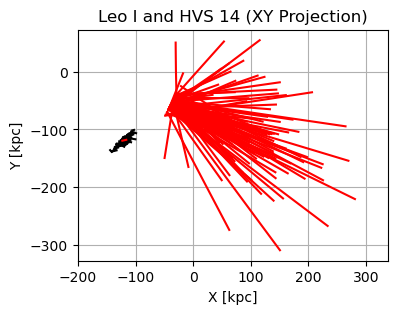

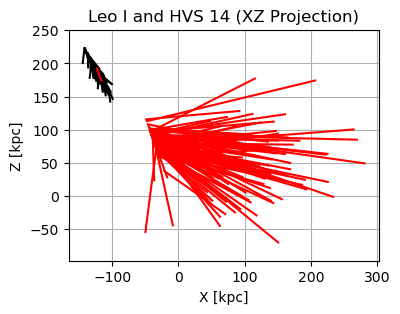

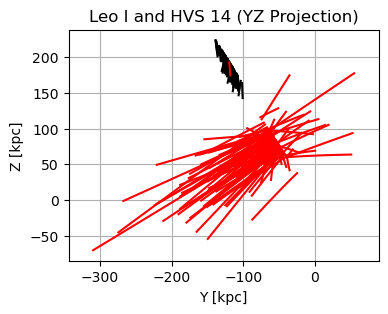

In [51]:
plt.figure(figsize=(4, 3))

for orbit in dwarf_orbits:
    pos = orbit.pos.xyz.value
    plt.plot(pos[0], pos[1], color='black')

for orbit in hvs14_orbits:
    pos = orbit.pos.xyz.value
    plt.plot(pos[0], pos[1], color='red')

plt.xlabel('X [kpc]')
plt.ylabel('Y [kpc]')
plt.title('Leo I and HVS 14 (XY Projection)')
plt.axis('equal')
plt.grid(True)
plt.show()

plt.figure(figsize=(4, 3))

for orbit in dwarf_orbits:
    pos = orbit.pos.xyz.value
    plt.plot(pos[0], pos[2], color='black')

for orbit in hvs14_orbits:
    pos = orbit.pos.xyz.value
    plt.plot(pos[0], pos[2], color='red')

plt.xlabel('X [kpc]')
plt.ylabel('Z [kpc]')
plt.title('Leo I and HVS 14 (XZ Projection)')
plt.axis('equal')
plt.grid(True)
plt.show()

plt.figure(figsize=(4, 3))

for orbit in dwarf_orbits:
    pos = orbit.pos.xyz.value
    plt.plot(pos[1], pos[2], color='black')

for orbit in hvs14_orbits:
    pos = orbit.pos.xyz.value
    plt.plot(pos[1], pos[2], color='red')

plt.xlabel('Y [kpc]')
plt.ylabel('Z [kpc]')
plt.title('Leo I and HVS 14 (YZ Projection)')
plt.axis('equal')
plt.grid(True)
plt.show()

Plot Leo I and HVS 23

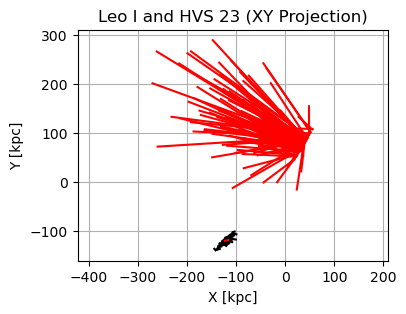

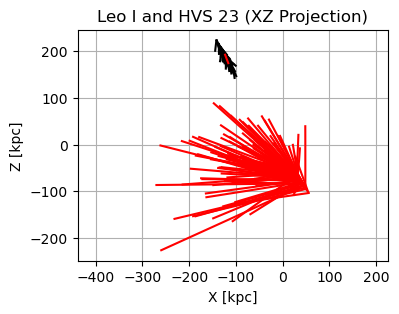

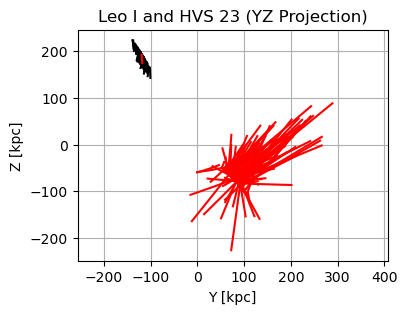

In [52]:
plt.figure(figsize=(4, 3))

for orbit in dwarf_orbits:
    pos = orbit.pos.xyz.value
    plt.plot(pos[0], pos[1], color='black')

for orbit in hvs23_orbits:
    pos = orbit.pos.xyz.value
    plt.plot(pos[0], pos[1], color='red')

plt.xlabel('X [kpc]')
plt.ylabel('Y [kpc]')
plt.title('Leo I and HVS 23 (XY Projection)')
plt.axis('equal')
plt.grid(True)
plt.show()

plt.figure(figsize=(4, 3))

for orbit in dwarf_orbits:
    pos = orbit.pos.xyz.value
    plt.plot(pos[0], pos[2], color='black')

for orbit in hvs23_orbits:
    pos = orbit.pos.xyz.value
    plt.plot(pos[0], pos[2], color='red')

plt.xlabel('X [kpc]')
plt.ylabel('Z [kpc]')
plt.title('Leo I and HVS 23 (XZ Projection)')
plt.axis('equal')
plt.grid(True)
plt.show()

plt.figure(figsize=(4, 3))

for orbit in dwarf_orbits:
    pos = orbit.pos.xyz.value
    plt.plot(pos[1], pos[2], color='black')

for orbit in hvs23_orbits:
    pos = orbit.pos.xyz.value
    plt.plot(pos[1], pos[2], color='red')

plt.xlabel('Y [kpc]')
plt.ylabel('Z [kpc]')
plt.title('Leo I and HVS 23 (YZ Projection)')
plt.axis('equal')
plt.grid(True)
plt.show()